# Stock Data
A stock is a general term used to describe the ownership certificates of any company. A share, on the other hand, refers to the stock certificate of a particular company. Holding a particular company's share makes you a shareholder. [https://economictimes.indiatimes.com/definition/stocks]

In [16]:
import yfinance as yf
import pandas as pd

In [17]:
# Devon Energy Corp
Devon= yf.Ticker("DVN")

In [18]:
Devon_info = twitter.info
Devon_info

{'zip': '94103',
 'sector': 'Communication Services',
 'fullTimeEmployees': 7500,
 'longBusinessSummary': "Twitter, Inc. operates as a platform for public self-expression and conversation in real-time. The company's primary product is Twitter, a platform that allows users to consume, create, distribute, and discover content. It also provides promoted products that enable advertisers to promote brands, products, and services, as well as enable advertisers to target an audience based on various factors, including who an account follows and actions taken on its platform, such as Tweets created and engagement with Tweets. Its promoted products consist of promoted ads and Twitter Amplify, Follower Ads, and Twitter takeover. In addition, the company offers monetization products for creators, including Tips to directly send small one-time payments on Twitter using various payment methods, including bitcoin; Super Follows, a paid monthly subscription, which includes bonus content, exclusive pr

In [19]:
Devon_info['country']

'United States'

In [20]:
Devon_share_price_data = twitter.history(period="max")

In [21]:
Devon_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,117701600,0,0
2013-11-08,45.930000,46.939999,40.689999,41.650002,27925300,0,0
2013-11-11,40.500000,43.000000,39.400002,42.900002,16113900,0,0
2013-11-12,43.660000,43.779999,41.830002,41.900002,6316700,0,0
2013-11-13,41.029999,42.869999,40.759998,42.599998,8688300,0,0


In [22]:
Devon_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

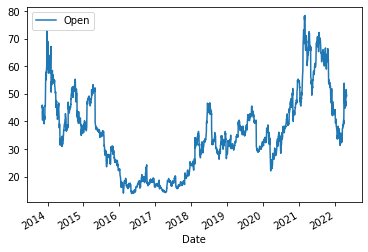

In [23]:
Devon_share_price_data.plot(x="Date", y="Open")

In [24]:
Devon.dividends

Date
1993-06-09    0.015
1993-09-09    0.015
1993-12-09    0.015
1994-03-09    0.015
1994-06-09    0.015
              ...  
2021-03-12    0.300
2021-06-11    0.340
2021-09-10    0.490
2021-12-09    0.840
2022-03-11    1.000
Name: Dividends, Length: 118, dtype: float64

<AxesSubplot:xlabel='Date'>

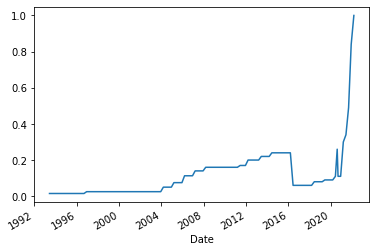

In [25]:
Devon.dividends.plot()